<a href="https://colab.research.google.com/github/rajshirolkar/ImageBasedMusicRecommenderSystem/blob/main/DSP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Image based Musivc Recommendation system Model to get song recommendations based on the emotions depicted in an image.

### Dataset : Spotify Dataset

### Face Emotion Recognition : DeepFace 

### Landscape Emotion Recognition : Dominant Color Extraction

In [13]:
!pip install easydev                 #version 0.12.0
!pip install colormap                #version 1.0.4
!pip install opencv-python           #version 4.5.5.64
!pip install colorgram.py            #version 1.2.0
!pip install extcolors               #version 1.0.0
!pip install scikit-learn seaborn scikit-image


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import extcolors

from colormap import rgb2hex
import random




# Preparing and Visualizing data 

In [16]:
import pandas as pd

data=pd.read_csv('data.csv.zip',compression='zip')
data.drop_duplicates(inplace=True,subset=['name'])
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [17]:
data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,132940.000000,132940.000000,1.329400e+05,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000,132940.000000
mean,0.495626,0.538530,2.312716e+05,0.488797,0.090199,0.165707,5.205168,0.211753,-11.437269,0.706981,30.358763,0.101847,116.934660,0.535494,1976.727531
std,0.378628,0.177049,1.256766e+05,0.267983,0.286467,0.311766,3.516930,0.182071,5.725657,0.455149,21.604561,0.164065,30.815993,0.262914,25.856419
min,0.000000,0.000000,5.991000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094700,0.416000,1.700822e+05,0.263000,0.000000,0.000000,2.000000,0.099200,-14.556000,0.000000,9.000000,0.035400,93.423500,0.327000,1955.000000
50%,0.495000,0.549000,2.077330e+05,0.481000,0.000000,0.000233,5.000000,0.138000,-10.496000,1.000000,32.000000,0.046200,114.803500,0.550000,1978.000000
75%,0.896000,0.670000,2.630165e+05,0.711000,0.000000,0.102000,8.000000,0.271000,-7.144000,1.000000,47.000000,0.080500,135.778250,0.753000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,97.000000,0.969000,244.091000,1.000000,2020.000000


### Use MinMaxScaler to scale the selected features between 0 to 1 for analysis
### Apply K-Means clustering algorithm for clustering

In [18]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Define the features to use for clustering
selected_features = ['danceability', 'energy', 'valence', 'loudness']

# Scale the selected features to a range between 0 and 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[selected_features])

# Perform K-means clustering on the scaled features
kmeans = KMeans(n_clusters=4, init="k-means++", random_state=15)
kmeans.fit(scaled_features)

# Add the cluster labels as a new column in the data
data['cluster_label'] = kmeans.labels_
data.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,cluster_label
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,0
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,2
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,0
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,0
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,2


### Box plot for clusters and valence

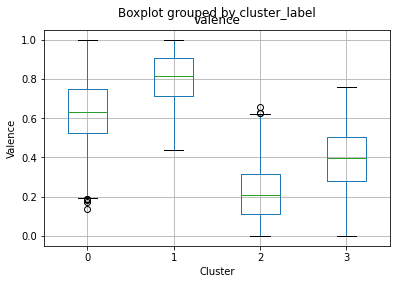

In [19]:
import matplotlib.pyplot as plt
data.boxplot(column='valence', by='cluster_label')
plt.ylabel('Valence')
plt.xlabel('Cluster')
plt.show()

### Pre-processing the data bfore fitting the model

In [20]:
# Remove duplicate rows based on the "name" column
data.drop_duplicates(inplace=True, subset=['name'])

# Assign the "name" column to a variable
name = data['name']

# Add a new column to the data containing the "name" values
data['song_name'] = name

# Group the data by the "cluster_label" column
cluster = data.groupby(by=data['cluster_label'])

# Remove the "kmeans" column from the data and assign it to a variable
y = data.pop('cluster_label')

# Remove unnecessary columns from the data and assign the remaining columns to a variable
cols_to_remove = ['name', 'artists', 'id', 'release_date', 'song_name']
x = data.drop(columns=cols_to_remove)

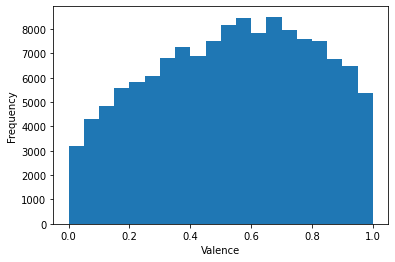

In [21]:
import matplotlib.pyplot as plt
plt.hist(data['valence'], bins=20)
plt.xlabel('Valence')
plt.ylabel('Frequency')
plt.show()

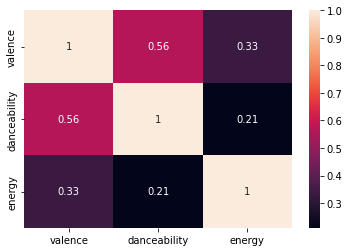

In [22]:
import seaborn as sns
sns.heatmap(data[['valence', 'danceability', 'energy']].corr(), annot=True)
plt.show()

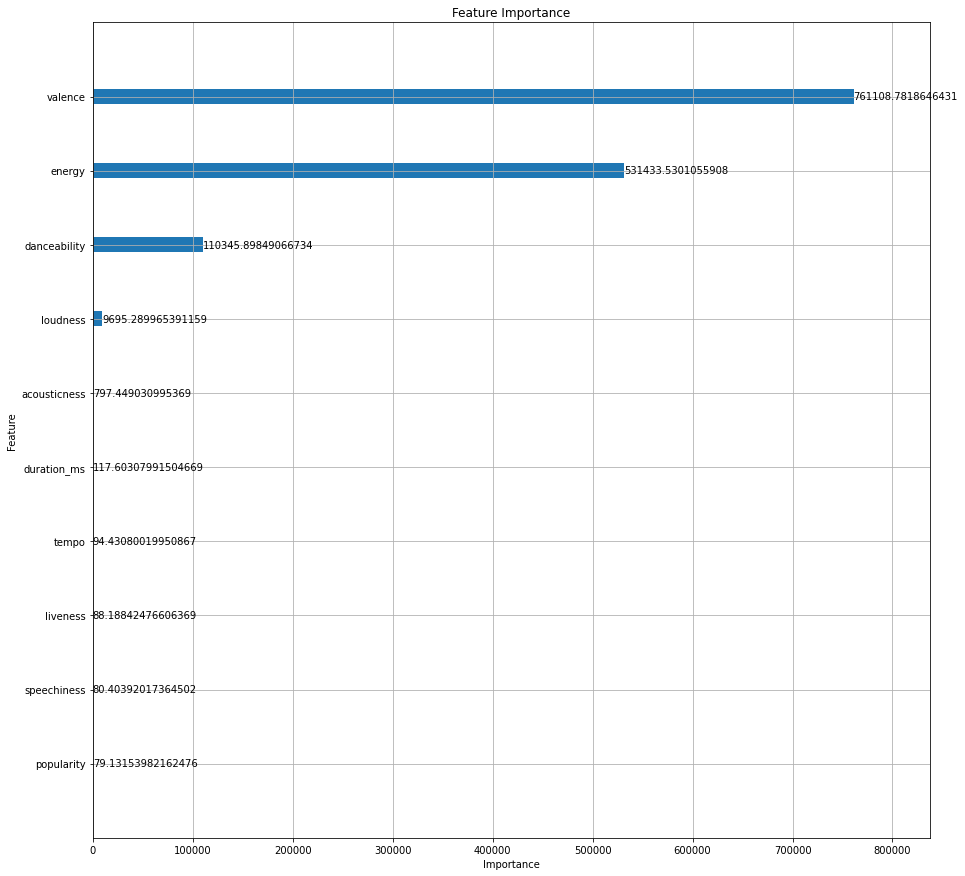

In [23]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

# Install lightgbm library and import LGBMClassifier
from lightgbm import LGBMClassifier, plot_importance

# Fit LGBMClassifier model on training data
model = LGBMClassifier().fit(x_train, y_train)

# create the feature importance plot
ax = plot_importance(model, max_num_features=10, figsize=(15,15), importance_type='gain')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Calculate the Silhouette score and other metrics to analyze the quality of the model since we are using unsupervised learning

In [24]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate silhouette score
# silhouette = silhouette_score(scaled_features, kmeans.labels_)
# print("Silhouette score:", silhouette)

# # Calculate Calinski-Harabasz index
# calinski_harabasz = calinski_harabasz_score(scaled_features, kmeans.labels_)
# print("Calinski-Harabasz index:", calinski_harabasz)

# # Calculate Davies-Bouldin index
# davies_bouldin = davies_bouldin_score(scaled_features, kmeans.labels_)
# print("Davies-Bouldin index:", davies_bouldin)


In [25]:
# Calculate Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(scaled_features, kmeans.labels_)
print("Calinski-Harabasz index:", calinski_harabasz)

Calinski-Harabasz index: 86498.43544772427


In [26]:
# Calculate Davies-Bouldin index
davies_bouldin = davies_bouldin_score(scaled_features, kmeans.labels_)
print("Davies-Bouldin index:", davies_bouldin)


Davies-Bouldin index: 1.0203368710700502


### Sort by popularity for the recommendations

In [27]:
df=cluster.apply(lambda x: x.sort_values(["popularity"],ascending=False))
df.reset_index(level=0, inplace=True)

## Get the dominant colors from the image

In [29]:
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans
import numpy as np

# read image
image = io.imread('test_images/image2.jpeg')

# reshape image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# initialize k-means model
model = KMeans(n_clusters=4)

# fit the model to the pixel values
model.fit(pixel_values)

# get the cluster labels for each pixel
labels = model.predict(pixel_values)

# get the counts of each label
counts = np.bincount(labels)

# get the index of the most frequent color
dominant_color_index = np.argmax(counts)

# get the RGB values for the dominant color
# dominant_color = model.cluster_centers_[dominant_color_index]
dominant_color = (model.cluster_centers_[dominant_color_index]).astype(int)
print(dominant_color)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[241 194  29]


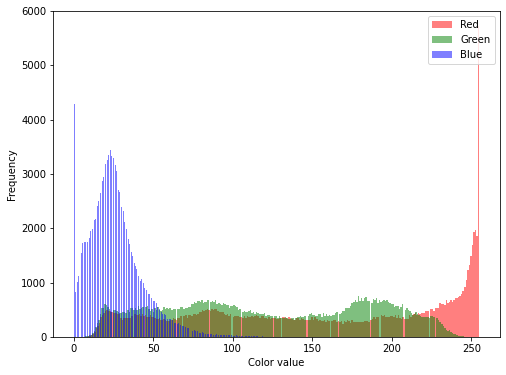

In [30]:
# plot the color composition of the image
plt.figure(figsize=(8, 6))
plt.hist(pixel_values[:, 0], bins=256, color='red', alpha=0.5, label='Red')
plt.hist(pixel_values[:, 1], bins=256, color='green', alpha=0.5, label='Green')
plt.hist(pixel_values[:, 2], bins=256, color='blue', alpha=0.5, label='Blue')
plt.xlabel('Color value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

## Map the dominant colors to emotions and map it with the clusters from spotify dataset

In [31]:
emotion_map = {
    (255, 0, 0): "angry", # red
    # (255, 165, 0): "excited", # 
    (255, 255, 0): "happy", #yellow
    (0, 128, 0): "calm", # green
    (0, 0, 255): "sad" # blue
    # (128, 0, 128): "relaxed" # purple
}

emotion_to_cluster_map = {
    "happy": 0,
    "calm": 1,
    "angry": 2,
    "sad": 3
}

def get_emotion(dominant_color, emotion_map):
    min_dist = float('inf')
    closest_color = None
    for color in emotion_map.keys():
        dist = np.sqrt(np.sum((dominant_color - np.array(color)) ** 2))
        if dist < min_dist:
            min_dist = dist
            closest_color = color
    return emotion_map[closest_color]

# get the closest emotion for the dominant color
dominant_emotion = get_emotion(dominant_color, emotion_map)
print(dominant_emotion)

happy


## Get the recommended song based on the emotion mapped

In [32]:
def get_results(emotion_cluster_number):
    result_set = df[df['cluster_label']==emotion_cluster_number]['song_name'].head(5)
    return pd.DataFrame(result_set)

get_results(emotion_to_cluster_map[dominant_emotion])

,song_name
87949,death bed (coffee for your head) (feat. beabad...
87953,Stuck with U (with Justin Bieber)
87856,Someone You Loved
87863,bad guy
87989,TKN (feat. Travis Scott)


In [33]:
results = get_results(emotion_to_cluster_map[dominant_emotion])
results.iloc[0]["song_name"]

'death bed (coffee for your head) (feat. beabadoobee)'

# Image Analysis and Emotion Extraction using DeepFace (AffectNet)

In [34]:
# Import necessary libraries
from deepface import DeepFace

# Load the pre-trained AffectNet model
model = DeepFace.build_model('Emotion')

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 52.7MB/s]


In [35]:
def color_to_df(input):
    colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
    df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
    df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
    #convert RGB to HEX code
    df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
                          int(i.split(", ")[1]),
                          int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
    df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
    return df

In [36]:
#ref: https://towardsdatascience.com/image-color-extraction-with-python-in-4-steps-8d9370d9216e

def exact_color(input_image, resize, tolerance, zoom):
    #background
    bg = 'bg.png'
    fig, ax = plt.subplots(figsize=(192,108),dpi=10)
    fig.set_facecolor('white')
    plt.savefig(bg)
    plt.close(fig)
    
    #resize
    output_width = resize
    img = Image.open(input_image)
    if img.size[0] >= resize:
      wpercent = (output_width/float(img.size[0]))
      hsize = int((float(img.size[1])*float(wpercent)))
      img = img.resize((output_width,hsize), Image.ANTIALIAS)
      resize_name = 'resize_'+ input_image
      img.save(resize_name)
    else:
        resize_name = input_image
    
    #crate dataframe
    img_url = resize_name

    colors_x = extcolors.extract_from_path(img_url, tolerance = tolerance, limit = 13)
    df_color = color_to_df(colors_x)
    
    #annotate text
    list_color = list(df_color['c_code'])
    list_precent = [int(i) for i in list(df_color['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_precent),1)) +'%' for c, p in zip(list_color, list_precent)]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(160,120), dpi = 10)
    
    print("Dominant color:", list_color[0])
    #donut plot
    wedges, text = ax1.pie(list_precent,
                           labels= text_c,
                           labeldistance= 1.05,
                           colors = list_color,
                           textprops={'fontsize': 150, 'color':'black'})
    plt.setp(wedges, width=0.3)

    #add image in the center of donut plot
    img = mpimg.imread(resize_name)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (0, 0))
    ax1.add_artist(ab)
    
    #color palette
    x_posi, y_posi, y_posi2 = 160, -170, -170
    for c in list_color:
        if list_color.index(c) <= 5:
            y_posi += 180
            rect = patches.Rectangle((x_posi, y_posi), 360, 160, facecolor = c)
            ax2.add_patch(rect)
            ax2.text(x = x_posi+400, y = y_posi+100, s = c, fontdict={'fontsize': 190})
        else:
            y_posi2 += 180
            rect = patches.Rectangle((x_posi + 1000, y_posi2), 360, 160, facecolor = c)
            ax2.add_artist(rect)
            ax2.text(x = x_posi+1400, y = y_posi2+100, s = c, fontdict={'fontsize': 190})

    fig.set_facecolor('white')
    ax2.axis('off')
    bg = plt.imread('bg.png')
    plt.imshow(bg)       
    plt.tight_layout()
    return plt.show()

In [59]:
def getEmotionFromImage(input_image, type):

  if(type == "face"):
    img = cv2.imread(input_image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (20 , 8))
    plt.imshow(img)
    # The enforce_detection=False argument tells the function 
    # not to perform face detection on the image, as AffectNet is a dataset of facial expressions.
    
    result = DeepFace.analyze(input_image, enforce_detection=False, detector_backend='dlib')
    print("Dominant emotion from result ", result[0]['dominant_emotion'])
    
    dominant_emotion = result[0]['dominant_emotion']
    print(dominant_emotion)

    results = get_results(emotion_to_cluster_map[dominant_emotion])
    # results.iloc[0]["song_name"]
    print("\nTop 5 recommendations: ")
    print(get_results(emotion_to_cluster_map[dominant_emotion]))



  

## Recommend Song function to get an image and get the link of the recommended song

In [62]:
# send image get song recommendation 

def recommendSong(image_path):

  # read image
  image = io.imread(image_path)

  print("\n\n Dominant colors of image: ")
  exact_color(image_path, 900, 12, 2.5)


  # reshape image to a 2D array of pixels and 3 color values (RGB)
  pixel_values = image.reshape((-1, 3))

  # initialize k-means model
  model = KMeans(n_clusters=5)

  # fit the model to the pixel values
  model.fit(pixel_values)

  # get the cluster labels for each pixel
  labels = model.predict(pixel_values)

  # get the counts of each label
  counts = np.bincount(labels)

  # get the index of the most frequent color
  dominant_color_index = np.argmax(counts)

  # get the RGB values for the dominant color
  # dominant_color = model.cluster_centers_[dominant_color_index]
  dominant_color = (model.cluster_centers_[dominant_color_index]).astype(int)
  # print(dominant_color)

  dominant_emotion = get_emotion(dominant_color, emotion_map)
  print("\nDominant emotion: ", dominant_emotion)
  print("\nTop 5 recommendations: ")
  print(get_results(emotion_to_cluster_map[dominant_emotion]))
  results = get_results(emotion_to_cluster_map[dominant_emotion])
  results.iloc[0]["song_name"]





# Demo

1. Upload the `/test_images` folder to your colab files to run the demos on test images.

## 1) Demo for images without faces using the image pixel colors






 Dominant colors of image: 
Dominant color: #FFCF1A


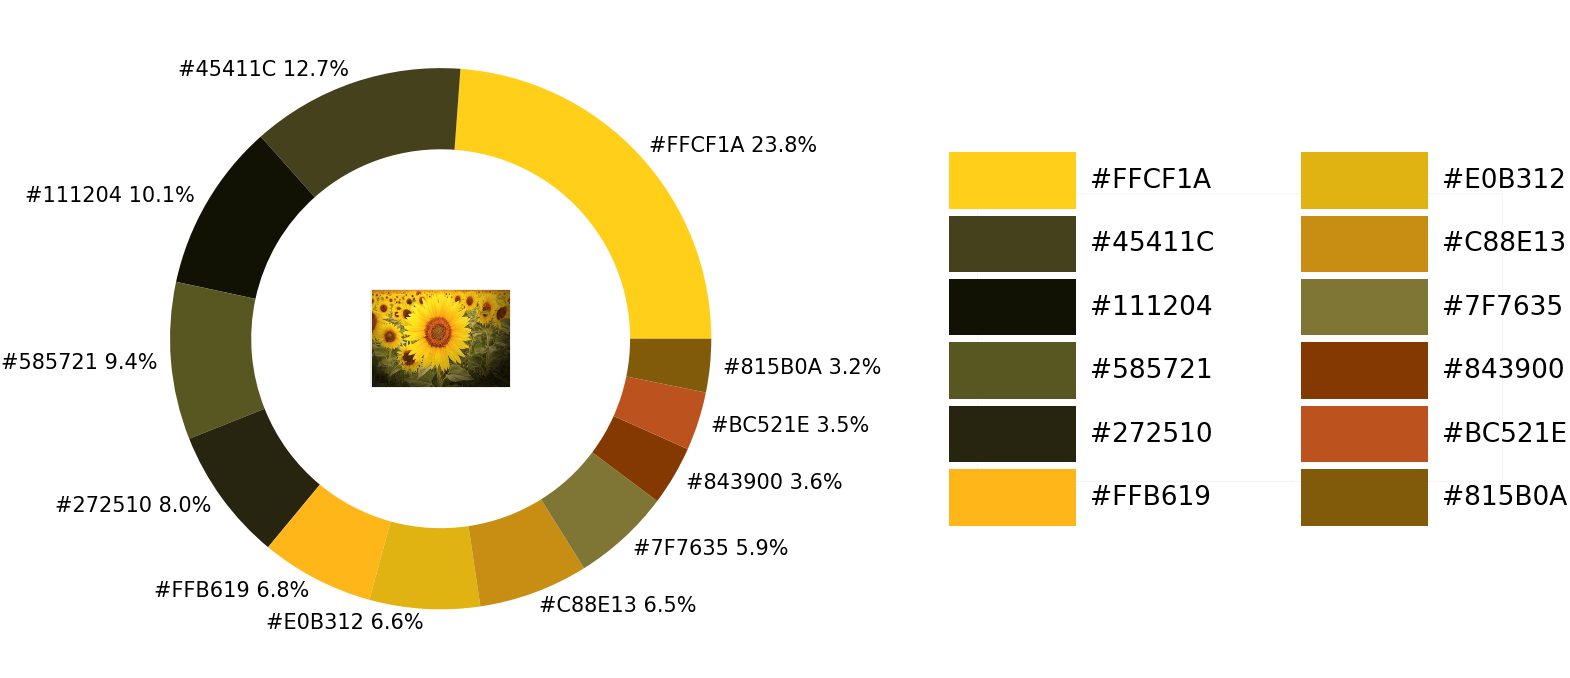


Dominant emotion:  happy

Top 5 recommendations: 
                                               song_name
87949  death bed (coffee for your head) (feat. beabad...
87953                  Stuck with U (with Justin Bieber)
87856                                  Someone You Loved
87863                                            bad guy
87989                           TKN (feat. Travis Scott)


In [63]:
recommendSong("test_images/image2.jpeg")



 Dominant colors of image: 
Dominant color: #3C2A54


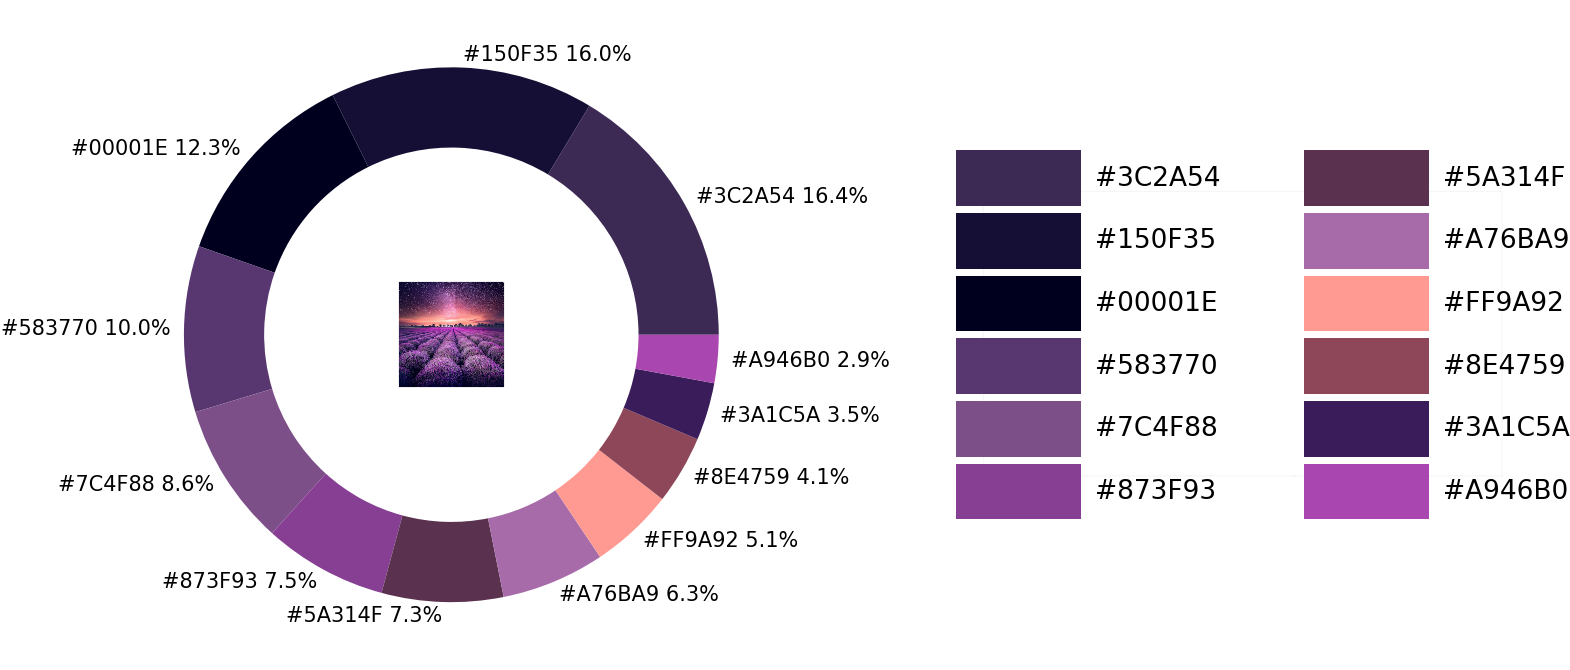


Dominant emotion:  calm

Top 5 recommendations: 
                             song_name
87844                       Supalonely
87858                     Dance Monkey
87952  Rain On Me (with Ariana Grande)
87850                  Don't Start Now
87947     Savage Remix (feat. Beyoncé)


In [64]:
recommendSong("test_images/calm_demo1.jpeg")



 Dominant colors of image: 
Dominant color: #161E0F


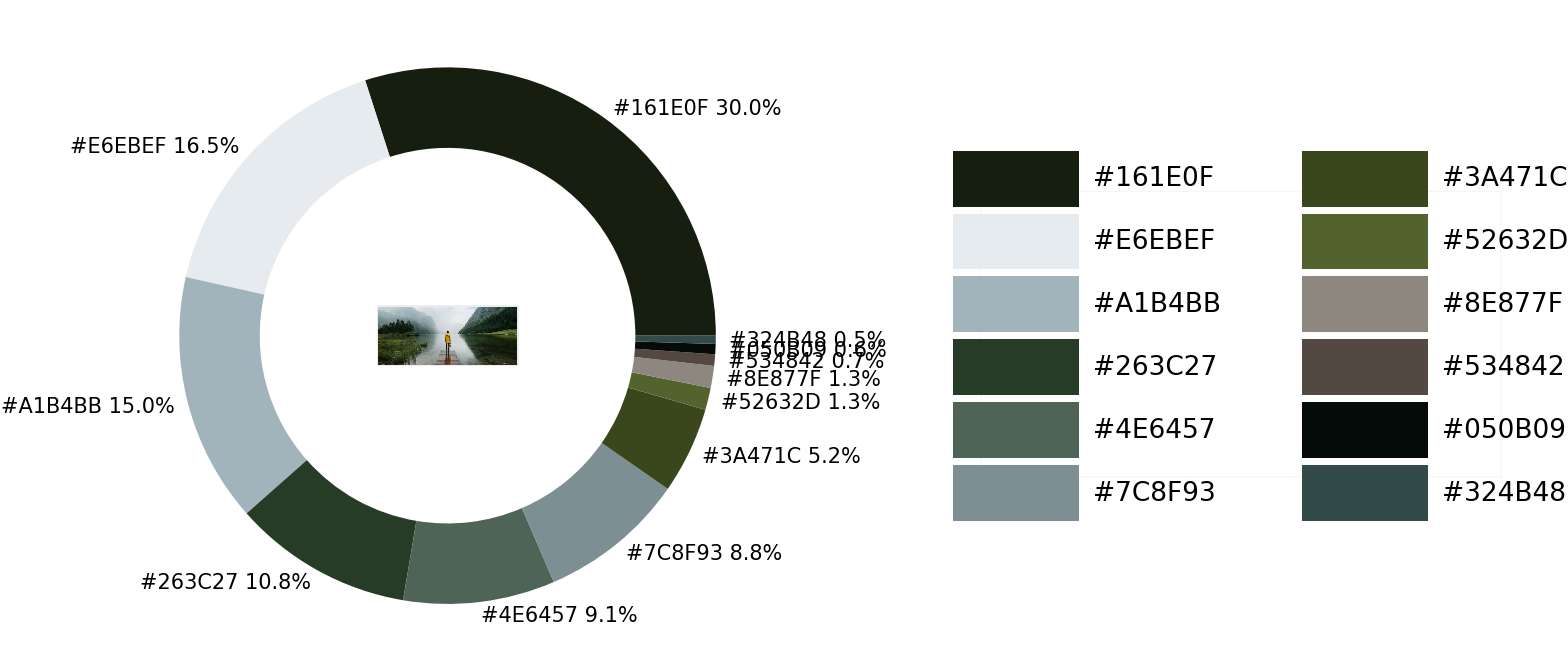


Dominant emotion:  calm

Top 5 recommendations: 
                             song_name
87844                       Supalonely
87858                     Dance Monkey
87952  Rain On Me (with Ariana Grande)
87850                  Don't Start Now
87947     Savage Remix (feat. Beyoncé)


In [65]:
recommendSong("test_images/calm_demo2.jpeg")

## 2) Demo for Images with faces using DeepFace AffectNet

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]


Dominant emotion from result  sad
sad

Top 5 recommendations: 
                                  song_name
87941                            THE SCOTTS
87852  ily (i love you baby) (feat. Emilee)
87951                                 GOOBA
87742                            SICKO MODE
87945                       Blueberry Faygo
None


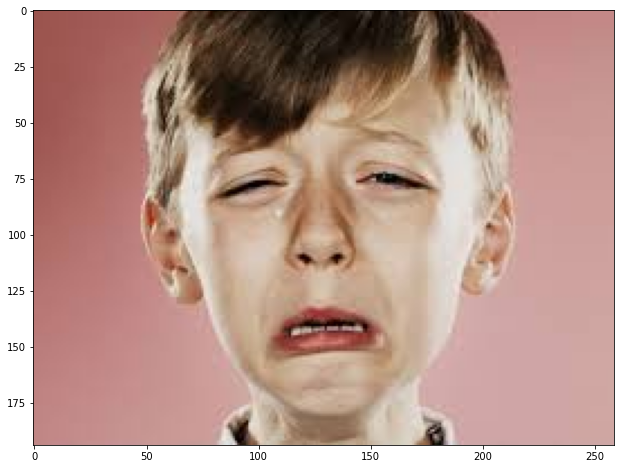

In [66]:
print(getEmotionFromImage("test_images/sad1.jpeg", "face"))

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]


Dominant emotion from result  angry
angry

Top 5 recommendations: 
                                       song_name
87857                        everything i wanted
87747                       lovely (with Khalid)
87955           Chicago Freestyle (feat. Giveon)
87870                      when the party's over
87653  Clean White Noise - Loopable with no fade
None


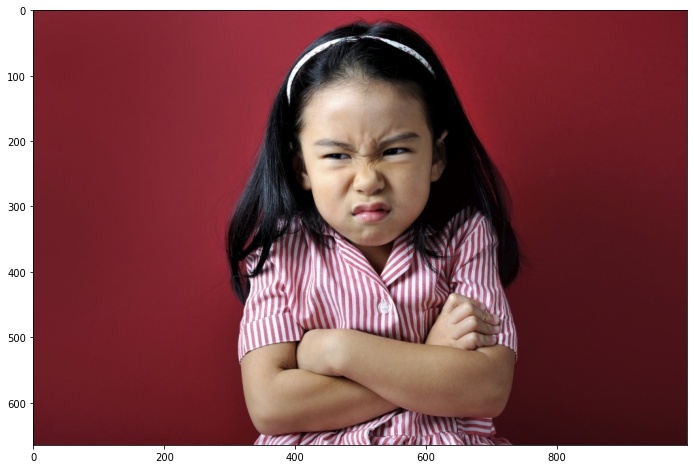

In [67]:
print(getEmotionFromImage("test_images/angry_demo.jpeg", "face"))

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


Dominant emotion from result  happy
happy

Top 5 recommendations: 
                                               song_name
87949  death bed (coffee for your head) (feat. beabad...
87953                  Stuck with U (with Justin Bieber)
87856                                  Someone You Loved
87863                                            bad guy
87989                           TKN (feat. Travis Scott)
None


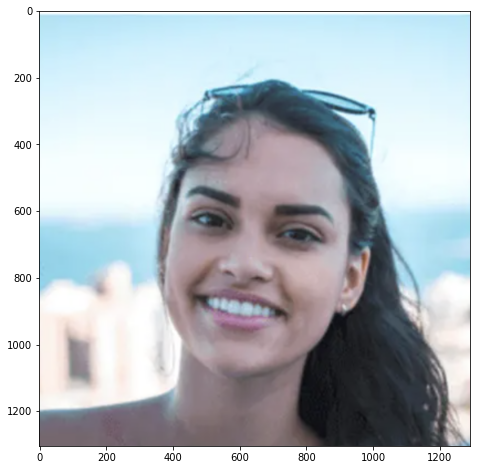

In [68]:
print(getEmotionFromImage("test_images/image3.png", "face"))

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


Dominant emotion from result  sad
sad

Top 5 recommendations: 
                                  song_name
87941                            THE SCOTTS
87852  ily (i love you baby) (feat. Emilee)
87951                                 GOOBA
87742                            SICKO MODE
87945                       Blueberry Faygo
None


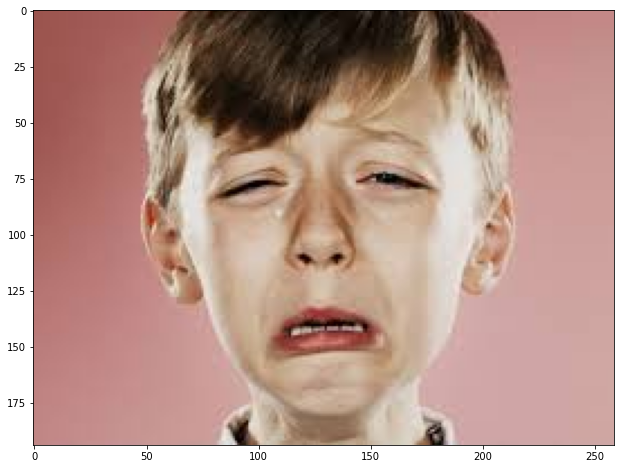

In [69]:
print(getEmotionFromImage("test_images/sad1.jpeg", "face"))

Action: race: 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


Dominant emotion from result  happy
happy

Top 5 recommendations: 
                                               song_name
87949  death bed (coffee for your head) (feat. beabad...
87953                  Stuck with U (with Justin Bieber)
87856                                  Someone You Loved
87863                                            bad guy
87989                           TKN (feat. Travis Scott)
None


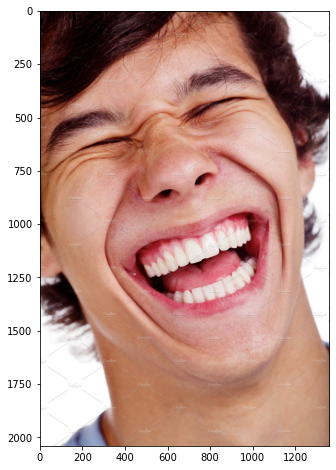

In [70]:
print(getEmotionFromImage("test_images/image5.jpeg", "face"))

In [71]:
# Paper references:
# https://dl.acm.org/doi/pdf/10.1145/3005358.3005366

# Test it out on your images!

1. Run the below cell and upload an image.
2. Type *face* if the image has faces in it and you would like to detect face emotions.
3. Type *noface* if it's a landscape image and you want to get the emotion based on the dominant color in the image

Saving eifel_tower.jpeg to eifel_tower.jpeg
Image name: eifel_tower.jpeg
Enter "face" or "noface": noface


 Dominant colors of image: 
Dominant color: #3F5F9C


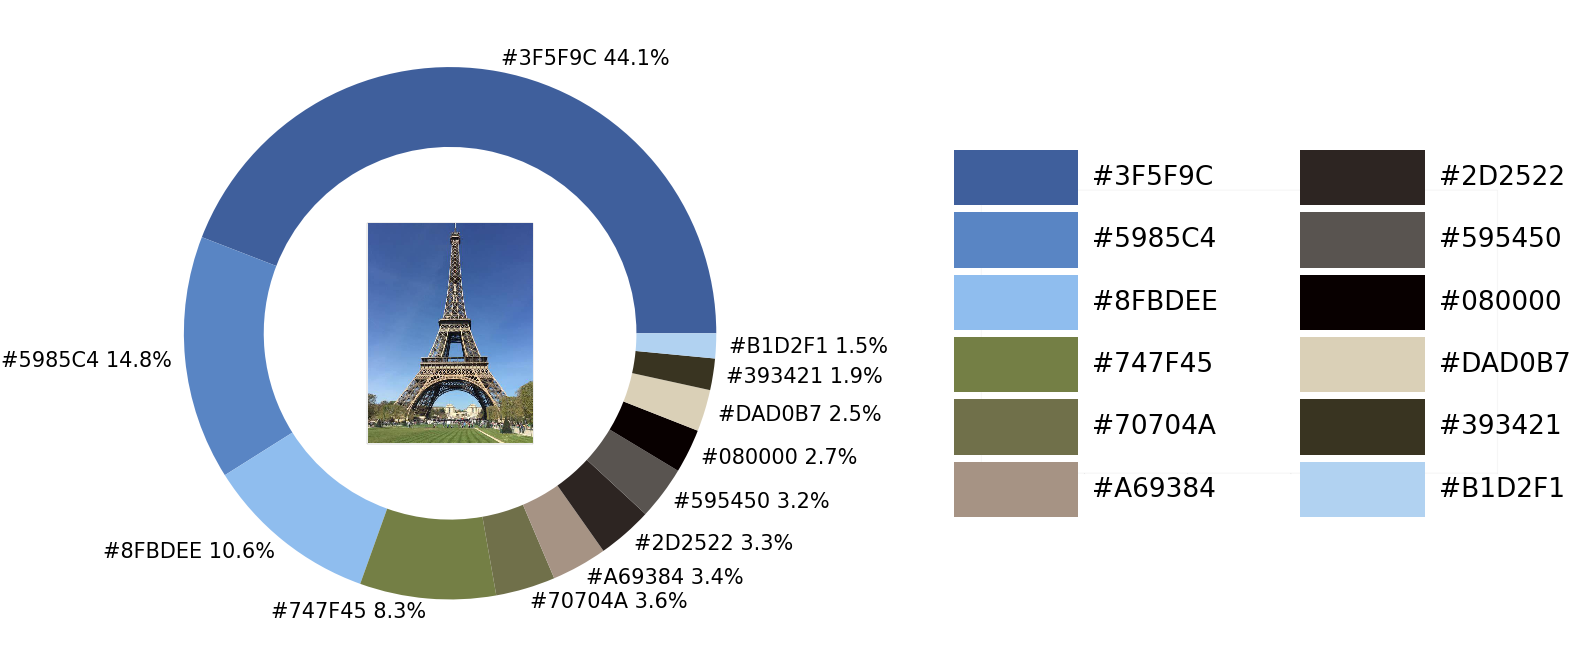


Dominant emotion:  sad

Top 5 recommendations: 
                                  song_name
87941                            THE SCOTTS
87852  ily (i love you baby) (feat. Emilee)
87951                                 GOOBA
87742                            SICKO MODE
87945                       Blueberry Faygo


In [73]:
from google.colab import files
from PIL import Image

uploaded = files.upload()
image_name = next(iter(uploaded.keys()))
image = Image.open(image_name)
print(f'Image name: {image_name}')

face_or_noface = input('Enter "face" or "noface": ')
if face_or_noface == 'face':
    print(getEmotionFromImage(image_name, "face"))
elif face_or_noface == 'noface':
    recommendSong(image_name)
else:
    print('Invalid input. Please enter either "face" or "noface".')